In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn import FunctionSampler
from imblearn.ensemble import BalancedBaggingClassifier

import joblib
import pickle

from imblearn.over_sampling import SMOTE

### Data load 

In [5]:
# Data
df = pd.read_csv('data/df.csv')


### Data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.head()

,customer_id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.615505,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.656039,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,118.750000,1.000000


### Preprocessing

In [7]:
def convert_dataframe(df):
    # Reemplazar valores en blanco o espacios vacíos con NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Convertir columnas binarias
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
    df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
    df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
    df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
    df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
    df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
    df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
    df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

    # Convertir columnas categóricas con One-Hot Encoding
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

    # Eliminar columnas no numéricas o innecesarias
    df = df.drop(columns=['customer_id'])

    # Asegurarse de que todas las columnas sean numéricas
    df = df.apply(pd.to_numeric, errors='coerce')

    # Eliminar filas con valores NaN
    df.dropna(inplace=True)

    return df

# Cargar el dataframe completo
df = pd.read_csv('data/df.csv') 

# Convertir los datos
df_final = convert_dataframe(df)

In [8]:
# Dividir en Train y Test csv
dftrain, dftest = train_test_split(df_final, test_size=0.2, random_state=42)

# Guardar los dataframes en archivos CSV
dftrain.to_csv('data/train.csv', index=False)
dftest.to_csv('data/test.csv', index=False)

In [9]:
# Cargar los datos de entrenamiento y prueba
dftrain = pd.read_csv('data/train.csv')
dftest = pd.read_csv('data/test.csv')

# Separar cvariables predictoras y variable objetivo
X_train = dftrain.drop('Churn', axis=1)
y_train = dftrain['Churn']
X_test = dftest.drop('Churn', axis=1)
y_test = dftest['Churn']

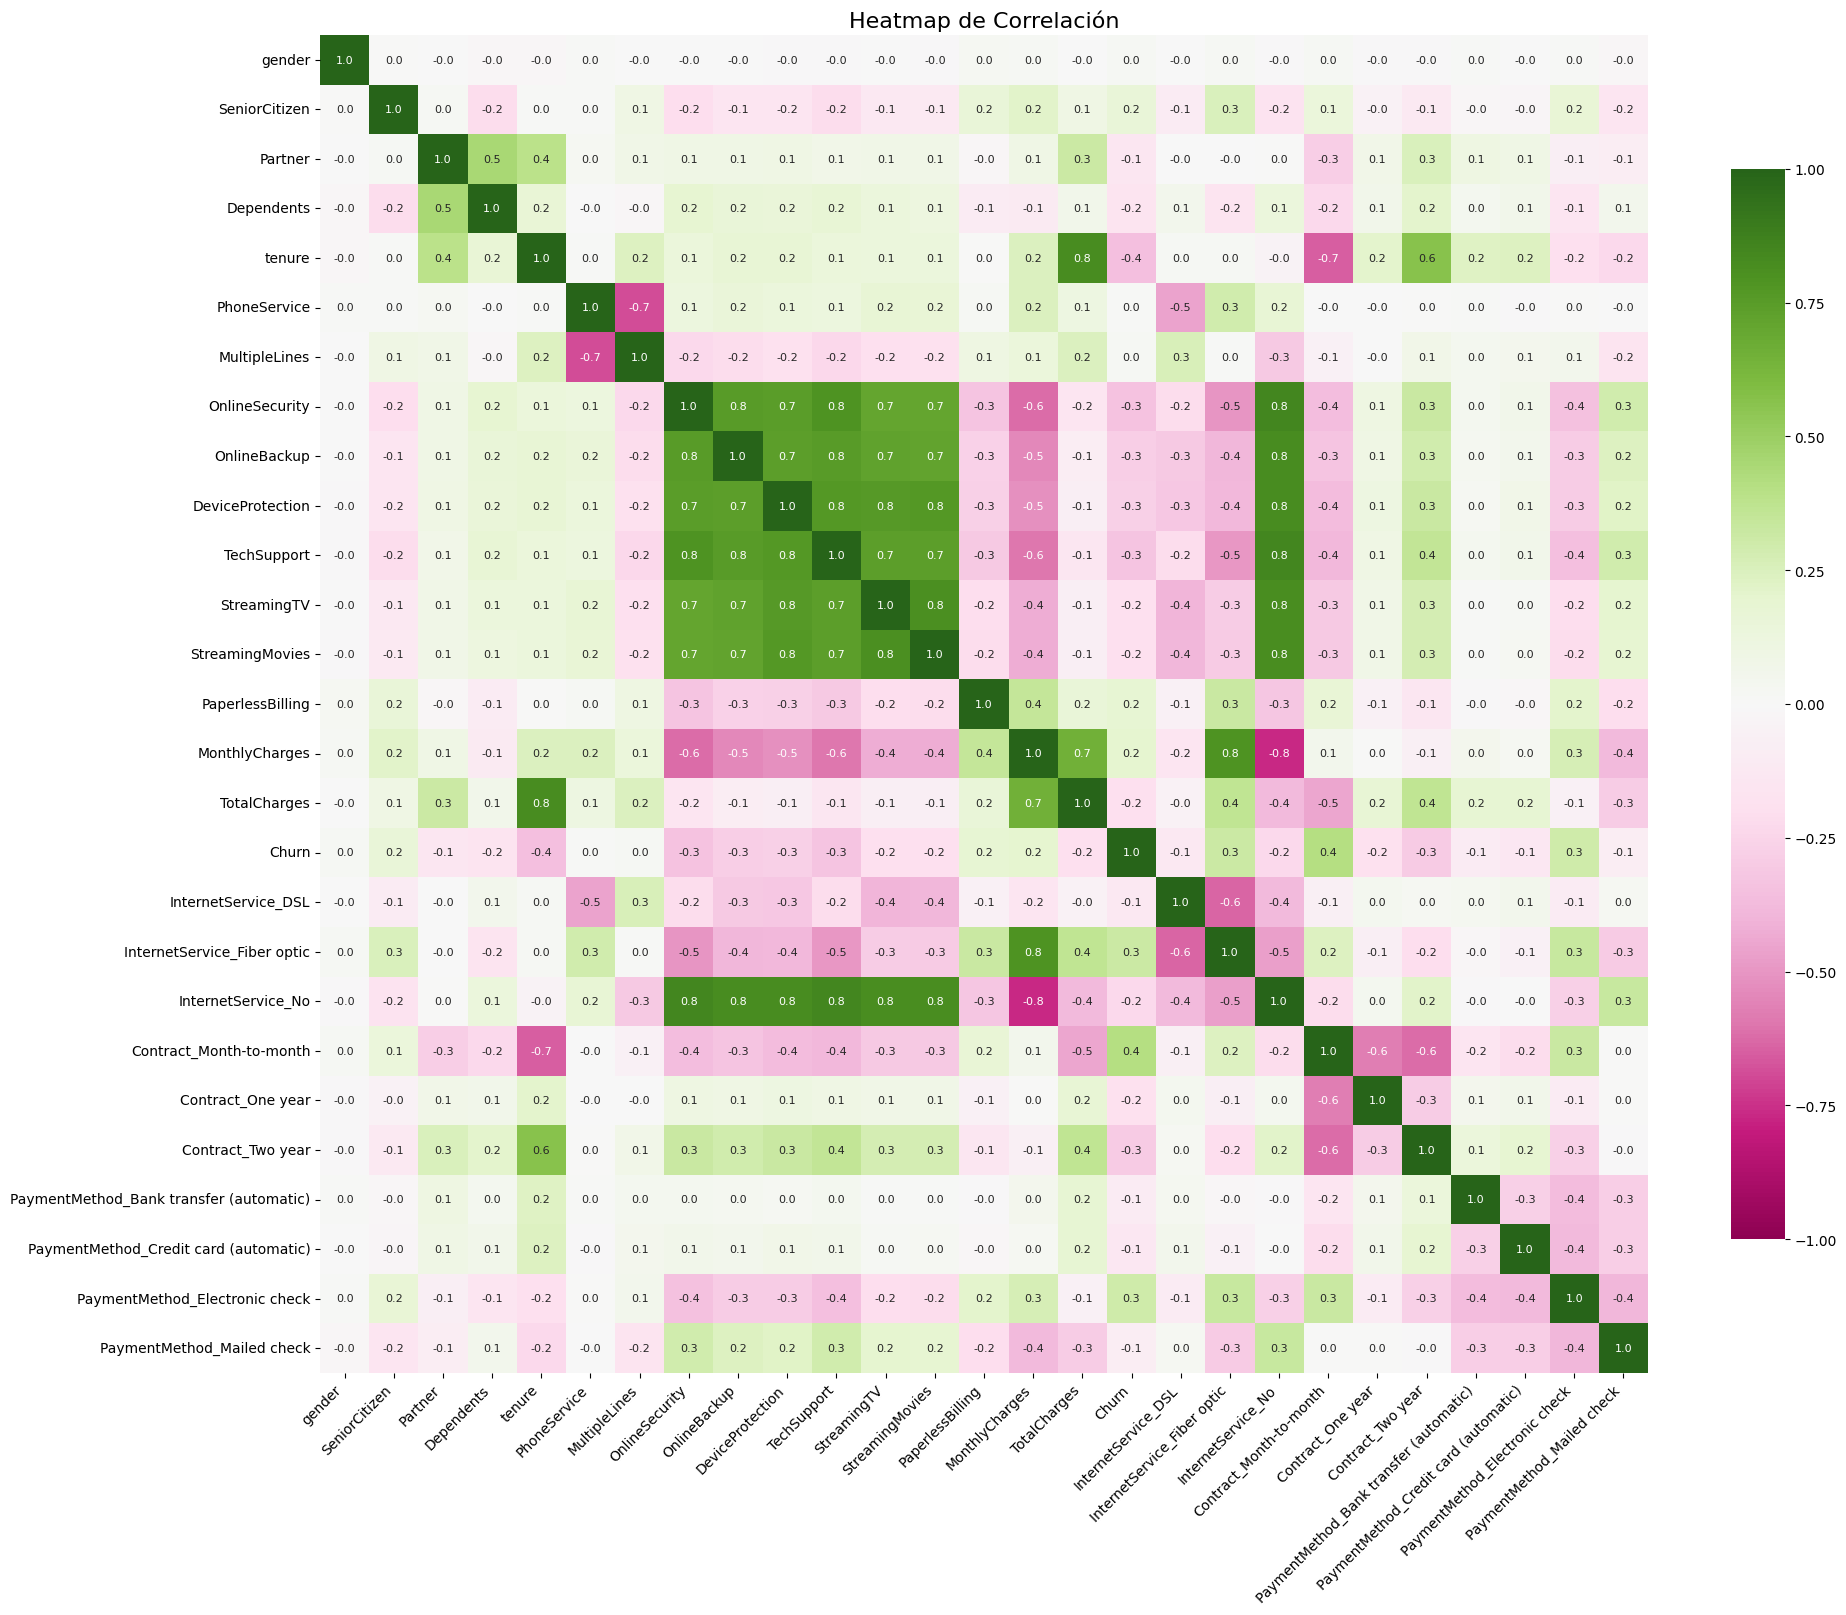

In [10]:
# Calcular la matriz de correlación
corr_matrix = dftrain.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Generar el heatmap de correlación
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.1f', vmin=-1, vmax=1,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

# Rotar las etiquetas para una mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
# Ajustar el diseño para una mejor visibilidad
plt.tight_layout()

plt.title('Heatmap de Correlación', fontsize=16)
plt.show()

In [11]:
# Eliminar variables
eliminar_var = ['gender', 'PhoneService', 'StreamingMovies', 'MonthlyCharges']
df = df.drop(columns=eliminar_var)


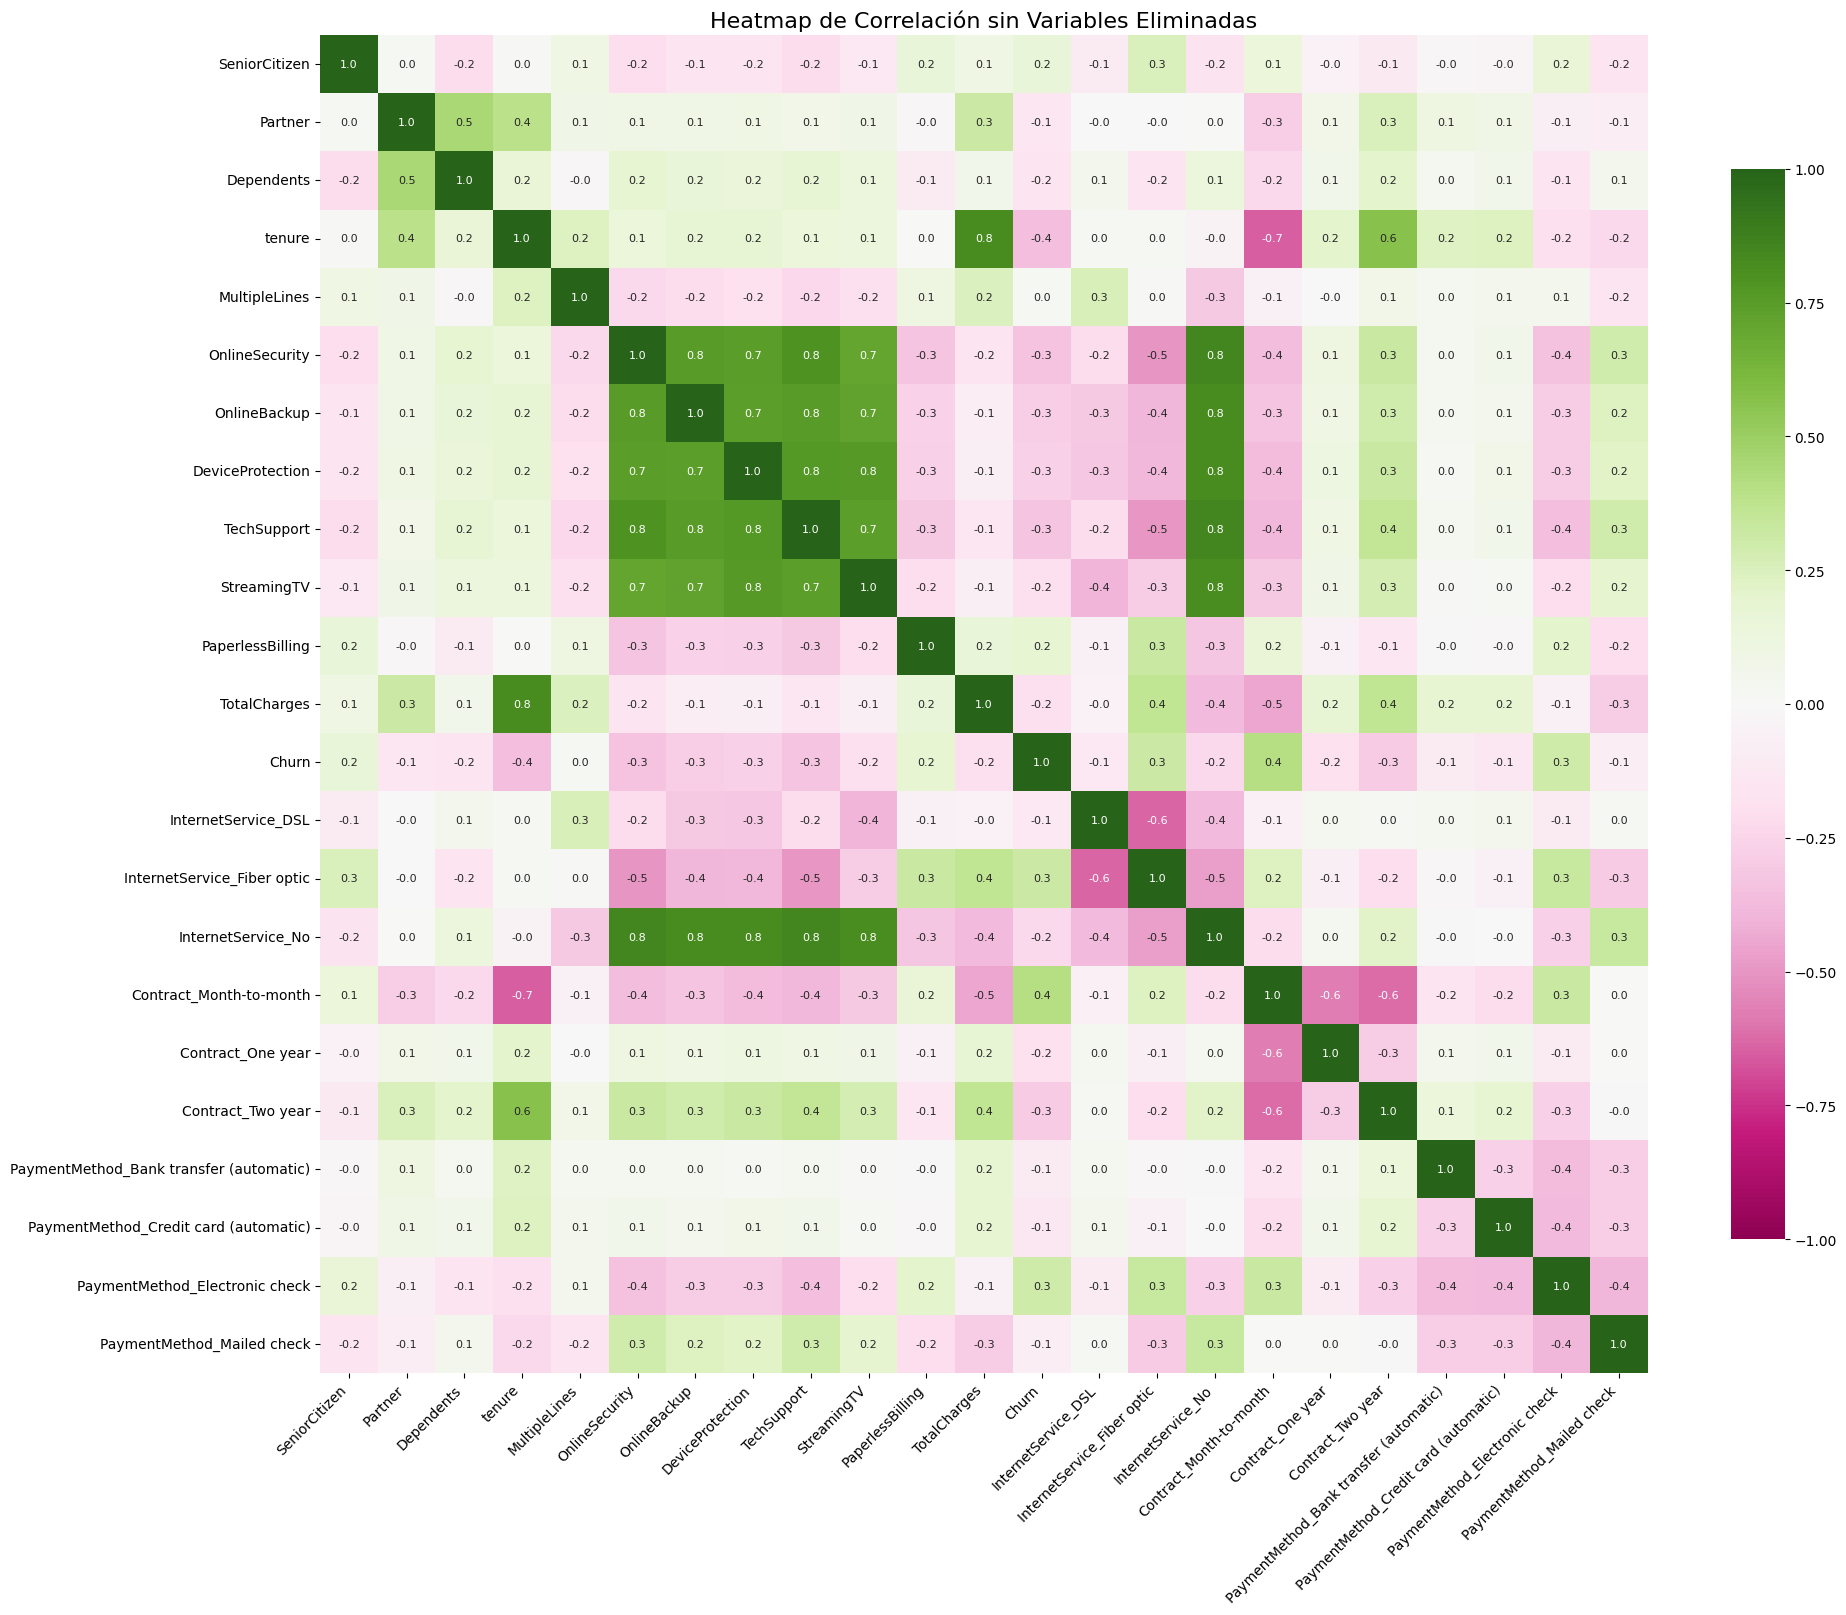

In [12]:
# Eliminar variables del DataFrame de entrenamiento
dftrain = dftrain.drop(columns=eliminar_var)

# Calcular la matriz de correlación
corr_matrix = dftrain.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Generar el heatmap de correlación
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.1f', vmin=-1, vmax=1,
            annot_kws={"size": 8}, cbar_kws={"shrink": .8})

# Rotar las etiquetas para una mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
# Ajustar el diseño para una mejor visibilidad
plt.tight_layout()

plt.title('Heatmap de Correlación sin Variables Eliminadas', fontsize=16)
plt.show()

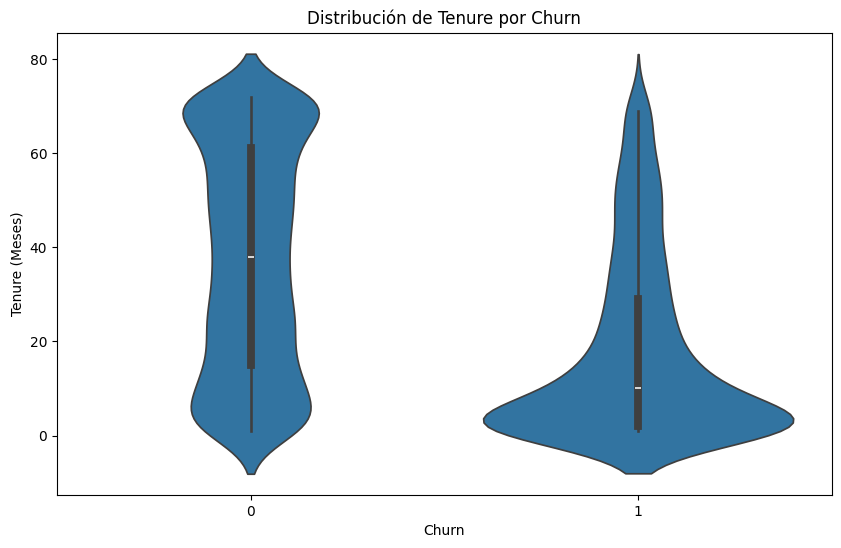

In [13]:
# Gráfico de violín para visualizar la relación entre Churn y tenure
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='tenure', data=dftrain)
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.show()

Churn=0:   
La distribución del tenure para los clientes que no han abandonado el servicio es más ancha y uniforme, indicando que estos clientes tienen una variedad de duraciones de permanencia. Hay picos en la densidad alrededor de los 10 y 60 meses, sugiriendo que hay ciertos periodos donde los clientes tienden a quedarse más tiempo.   
Churn=1:   
La distribución del tenure para los clientes que han abandonado el servicio es más estrecha, con una densidad mayor en valores bajos de tenure. Esto indica que los clientes que abandonan tienden a hacerlo en los primeros meses de su contrato.

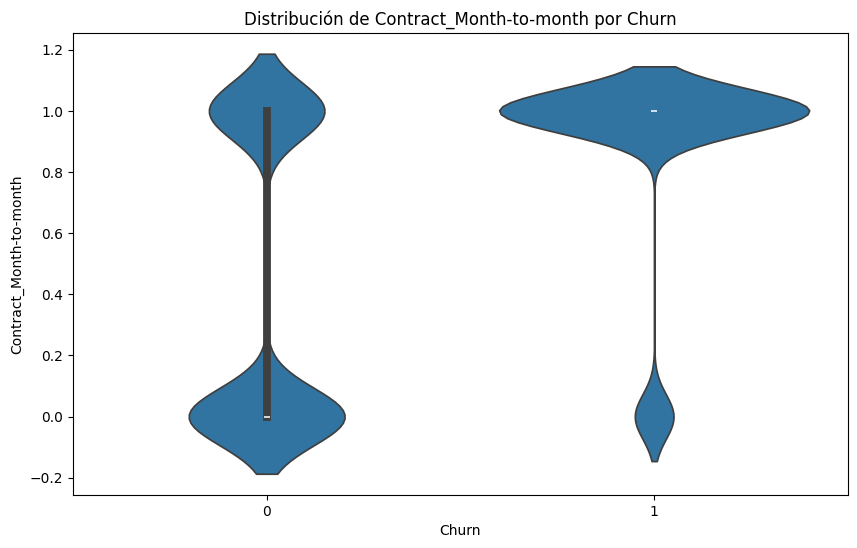

In [23]:
# Gráfico de violín para visualizar la relación entre Churn y Contract_Month-to-month
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Contract_Month-to-month', data=dftrain)
plt.title('Distribución de Contract_Month-to-month por Churn')
plt.xlabel('Churn')
plt.ylabel('Contract_Month-to-month')
plt.show()

Churn=0:   
Para los clientes que no han abandonado el servicio (Churn=0), la mayoría no tienen el contrato "Month-to-month". Esto se ve en el gráfico porque la densidad es mayor en el valor de 0.   
Churn=1:   
Para los clientes que han abandonado el servicio (Churn=1), la mayoría tienen el contrato "Month-to-month". La densidad es mayor en el valor de 1.

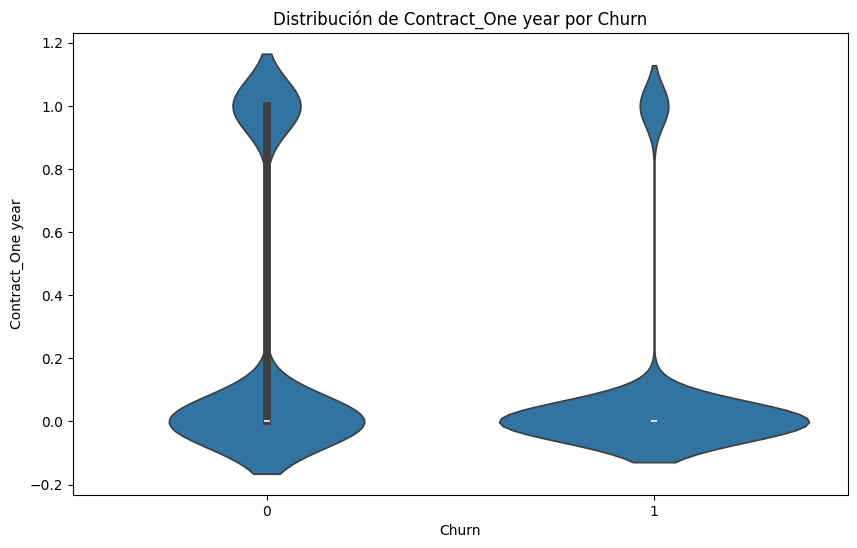

In [22]:
# Gráfico de violín para visualizar la relación entre Churn y Contract_One year
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Contract_One year', data=dftrain)
plt.title('Distribución de Contract_One year por Churn')
plt.xlabel('Churn')
plt.ylabel('Contract_One year')
plt.show()

Churn=0:   
Para los clientes que no han abandonado el servicio (Churn=0), hay una mayor densidad en el valor de 1, indicando que una buena parte de estos clientes tienen el contrato de 1 año.
Churn=1:   
Para los clientes que han abandonado el servicio (Churn=1), la densidad está cerca de 0, indicando que pocos clientes con el contrato de 1 año han abandonado el servicio.

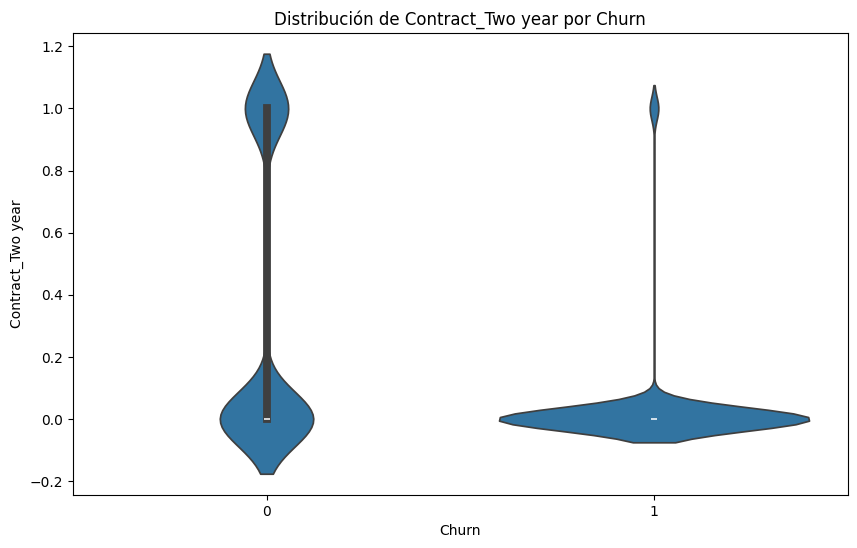

In [24]:
# Gráfico de violín para visualizar la relación entre Churn y Contract_Two year
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Contract_Two year', data=dftrain)
plt.title('Distribución de Contract_Two year por Churn')
plt.xlabel('Churn')
plt.ylabel('Contract_Two year')
plt.show()

Churn=0:   
Para los clientes que no han abandonado el servicio (Churn=0), hay una mayor densidad en el valor de 1, indicando que una buena parte de estos clientes tienen el contrato de 2 años.   
Churn=1:   
Para los clientes que han abandonado el servicio (Churn=1), la densidad está cerca de 0, indicando que pocos clientes con el contrato de 2 años han abandonado el servicio.

### Random Forest

In [88]:
# Modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Predecir en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

In [93]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.46      0.52       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



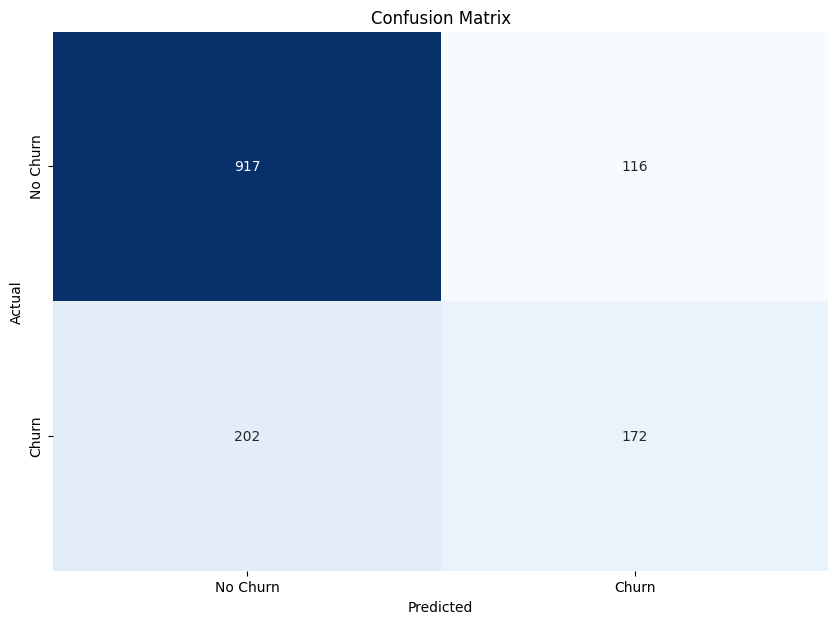

In [94]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Classifier

In [95]:
# Crear el pipeline con GradientBoostingClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [96]:
# Definir la búsqueda de hiperparámetros incluyendo parámetros de regularización
param_grid = {
    'pca__n_components': [5, 7, 9],
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 4]
}

In [97]:
# Búsqueda de hiperparámetros CUIDADO!!!!!!!!!!!!!!!!!!!!!!!!
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

In [98]:
# Guardar el mejor modelo utilizando pickle
with open('mejor_modelo.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Cargar el modelo guardado para verificar
with open('mejor_modelo.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Verificar que el modelo cargado funciona
print(loaded_model.predict(X_test[:5]))  # Hacer predicciones con el modelo cargado

[0 0 0 0 0]


In [99]:
# Predecir en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

In [100]:
# Calcular el accuracy score del mejor modelo
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f'Accuracy del mejor modelo en entrenamiento: {train_accuracy:.4f}')
print(f'Accuracy del mejor modelo en prueba: {test_accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy del mejor modelo en entrenamiento: 0.8123
Accuracy del mejor modelo en prueba: 0.7797
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



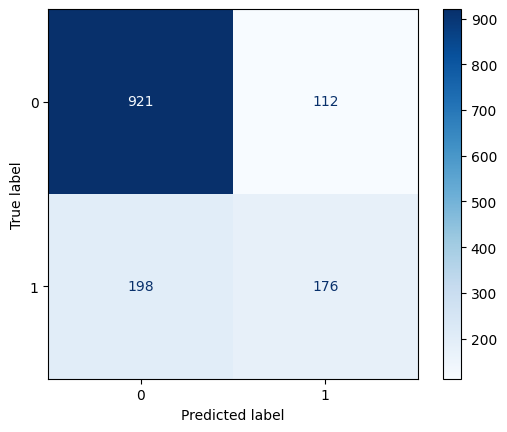

In [101]:
# Representar la matriz de confusión del mejor modelo
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()


=================================   

Pros: La precisión general del modelo es razonable con un 78%.
Cons: La precisión (0.61) y el recall (0.47) para la clase 1 son moderados, lo que sugiere que el modelo tiene dificultades para distinguir la clase 1 correctamente. Esto no es satisfactorio porque la clase 1 es importante en el contexto del negocio o aplicación.
Como medida voy a hacer un balanceo de clases y ajuste de hiperparámetros para mejorar el rendimiento.

In [102]:
# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para el balanceo de clases
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(f"Nuevas formas de X: {X_resampled.shape}, y: {y_resampled.shape}")

Nuevas formas de X: (8260, 26), y: (8260,)


In [103]:
# El submuestreo (undersampling) consiste en reducir el número de instancias de la clase mayoritaria.
from imblearn.under_sampling import RandomUnderSampler

# Crear una instancia de RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo para el balanceo de clases
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(f"Nuevas formas de X: {X_resampled.shape}, y: {y_resampled.shape}")

Nuevas formas de X: (2990, 26), y: (2990,)


In [104]:
# Combinar Sobremuestreo y Submuestreo. Combinar ambas técnicas para lograr un mejor balanceo de clases.

from imblearn.combine import SMOTEENN

# Crear una instancia de SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Aplicar SMOTEENN para el balanceo de clases
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print(f"Nuevas formas de X: {X_resampled.shape}, y: {y_resampled.shape}")

Nuevas formas de X: (4664, 26), y: (4664,)


In [105]:
# Ajuste de Hiperparámetros. Definir el Pipeline incluyendo el balanceo de clases y el modelo de clasificación.
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Usar SMOTE para sobremuestrear
    ('pca', PCA()),  # Reducción de dimensionalidad opcional
    ('classifier', GradientBoostingClassifier())
])

In [106]:
# Definir la Búsqueda de un conjunto de hiperparámetros para buscar el mejor modelo.
param_grid = {
    'pca__n_components': [5, 7, 9],
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 4]
}

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



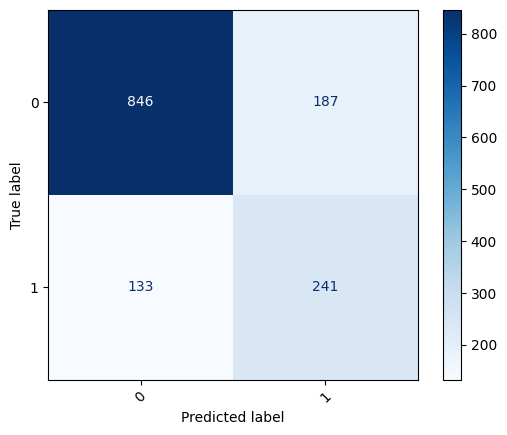

In [115]:
grid_search_simple = GridSearchCV(pipeline_simple, param_grid_simple, cv=3, n_jobs=-1, scoring='accuracy')

try:
    grid_search_simple.fit(X_train, y_train)
    best_model_simple = grid_search_simple.best_estimator_

    with open('mejor_modelo_simple.pkl', 'wb') as f:
        pickle.dump(best_model_simple, f)

    with open('mejor_modelo_simple.pkl', 'rb') as f:
        loaded_model_simple = pickle.load(f)

    y_pred_simple = loaded_model_simple.predict(X_test)

    accuracy_simple = accuracy_score(y_test, y_pred_simple)
    print(f'Accuracy: {accuracy_simple:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred_simple))

    conf_matrix_simple = confusion_matrix(y_test, y_pred_simple)
    disp_simple = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_simple, display_labels=np.unique(y_test))
    disp_simple.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=45)
    plt.show()

except ValueError as e:
    print(f"Error durante la búsqueda de hiperparámetros: {e}")

In [ ]:
# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Guardar el mejor modelo utilizando pickle
with open('mejor_modelo.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Cargar el modelo guardado para verificar
with open('mejor_modelo.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Hacer predicciones con el modelo cargado
y_pred = loaded_model.predict(X_test)

# Evaluar la precisión del modelo cargado
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Representar la matriz de confusión del mejor modelo
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()